In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [3]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [4]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [5]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [6]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [7]:
data.head()

,index,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,17360,17358.0,17358,1,0.999966667777741,0.499991666805553,0.33332222259258,0.33332222259258,0.666655555740738,0.444439506227709,...,20.8752372264862,-2.40457093715668,4.0191792845726,-3.57601604424417,2.91561061143875,-3.15804140269756,-6.16667497158051,12.5028209090233,11.9213329255581,-4.67211927473545
1,390478,210476.0,210476,1,0.999966667777741,0.999966667777741,0.857130612419823,0.857130612419823,0.899991000089999,0.899991000089999,...,11.4862600266933,-6.62645951844752,-11.4323774334043,5.23537443205714,28.6001185923815,-2.30729711800814,-10.8353581726551,22.7839944660664,3.99732052348554,-10.9033261742443
2,91787,91785.0,91785,0,0.0,0.0,0.749981250468738,0.374995312558593,0.374995312558593,0.199998666675556,...,10.8924257443286,-3.18409180641174,10.3452143147588,-5.96205586194992,5.07733878493309,7.2000600323081,0.655819900333881,-3.72575321793556,0.562801200896502,5.70733787899371
3,910620,370618.0,370618,0,0.999988889012344,0.818174380232907,0.857130612419823,0.749990625117186,0.833328703729424,0.789469529107742,...,3.61397653073072,37.6025669202208,-0.763402219861746,-19.4511822948698,21.2774221301079,11.3005593046546,-33.9786793887615,14.1959414482117,0.144882522523403,6.66092678159475
4,71978,71976.0,71976,0,0.999975000624984,0.799984000319994,0.999975000624984,0.799984000319994,0.999987500156248,0.799992000079999,...,-2.48141431808472,-5.89215413480997,0.600838005542755,-2.93423330783844,14.5442776679993,5.23808778636158,-14.48910609819,12.0202481001616,-6.97171917557716,-7.35021275281906


In [8]:
print(data.index[0])

0


In [9]:
# remove the first row 
data.drop(data.index[0], inplace=True)

In [10]:
data.head()

,index,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,390478,210476.0,210476,1,0.999966667777741,0.999966667777741,0.857130612419823,0.857130612419823,0.899991000089999,0.899991000089999,...,11.4862600266933,-6.62645951844752,-11.4323774334043,5.23537443205714,28.6001185923815,-2.30729711800814,-10.8353581726551,22.7839944660664,3.99732052348554,-10.9033261742443
2,91787,91785.0,91785,0,0.0,0.0,0.749981250468738,0.374995312558593,0.374995312558593,0.199998666675556,...,10.8924257443286,-3.18409180641174,10.3452143147588,-5.96205586194992,5.07733878493309,7.2000600323081,0.655819900333881,-3.72575321793556,0.562801200896502,5.70733787899371
3,910620,370618.0,370618,0,0.999988889012344,0.818174380232907,0.857130612419823,0.749990625117186,0.833328703729424,0.789469529107742,...,3.61397653073072,37.6025669202208,-0.763402219861746,-19.4511822948698,21.2774221301079,11.3005593046546,-33.9786793887615,14.1959414482117,0.144882522523403,6.66092678159475
4,71978,71976.0,71976,0,0.999975000624984,0.799984000319994,0.999975000624984,0.799984000319994,0.999987500156248,0.799992000079999,...,-2.48141431808472,-5.89215413480997,0.600838005542755,-2.93423330783844,14.5442776679993,5.23808778636158,-14.48910609819,12.0202481001616,-6.97171917557716,-7.35021275281906
5,105691,105689.0,105689,0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.01064729690552,21.0445706956088,-3.85013589821756,-5.39577338844538,19.4622658714652,-6.68407837637642,-24.9288227260113,9.37689936161041,18.2252001874149,-0.0750994607806206


In [11]:
y_true = data['is_duplicate']

In [13]:
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [14]:
# remove the first row 
# data.drop(data.index[0], inplace=True)
# y_true = data['is_duplicate']
# data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [15]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.999966667777741,0.999966667777741,0.857130612419823,0.857130612419823,0.899991000089999,0.899991000089999,1.0,1.0,0.0,10.0,...,11.4862600266933,-6.62645951844752,-11.4323774334043,5.23537443205714,28.6001185923815,-2.30729711800814,-10.8353581726551,22.7839944660664,3.99732052348554,-10.9033261742443
2,0.0,0.0,0.749981250468738,0.374995312558593,0.374995312558593,0.199998666675556,0.0,1.0,7.0,11.5,...,10.8924257443286,-3.18409180641174,10.3452143147588,-5.96205586194992,5.07733878493309,7.2000600323081,0.655819900333881,-3.72575321793556,0.562801200896502,5.70733787899371
3,0.999988889012344,0.818174380232907,0.857130612419823,0.749990625117186,0.833328703729424,0.789469529107742,0.0,1.0,1.0,18.5,...,3.61397653073072,37.6025669202208,-0.763402219861746,-19.4511822948698,21.2774221301079,11.3005593046546,-33.9786793887615,14.1959414482117,0.144882522523403,6.66092678159475
4,0.999975000624984,0.799984000319994,0.999975000624984,0.799984000319994,0.999987500156248,0.799992000079999,1.0,1.0,2.0,9.0,...,-2.48141431808472,-5.89215413480997,0.600838005542755,-2.93423330783844,14.5442776679993,5.23808778636158,-14.48910609819,12.0202481001616,-6.97171917557716,-7.35021275281906
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,18.0,...,5.01064729690552,21.0445706956088,-3.85013589821756,-5.39577338844538,19.4622658714652,-6.68407837637642,-24.9288227260113,9.37689936161041,18.2252001874149,-0.0750994607806206


<h2> 4.2 Converting strings to numerics </h2>

In [16]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [17]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

# Splitting Data befor Vectorization

## A. Data PreParation

In [104]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [105]:

# dropping only qid1, qid1 from the advanced features
df1 = dfnlp.drop(['qid1','qid2',],axis=1)
# dropping only qid1 , qid2, question1, question2 from the advanced features
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

# so finaldf_all = 19columns(df1) + 12columns(df2) = 31 columns

In [106]:
df1.head(2)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [107]:
df2.head(2)

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [108]:
# joining advancedfeatures(df1) and normalfeatures(df2) taking index in common id
finaldf_all = df1.join(df2.set_index('id'), on='id')

In [109]:
finaldf_all.shape

(404290, 30)

In [110]:
finaldf_all.head(2)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,...,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [111]:
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
finaldf_all['question1'] = finaldf_all['question1'].apply(lambda x: str(x))
finaldf_all['question2'] = finaldf_all['question2'].apply(lambda x: str(x))

In [112]:
print(finaldf_all['is_duplicate'].value_counts())
print('Percentage of class 0 / class 1 = ',sum(finaldf_all['is_duplicate']==0)/sum(finaldf_all['is_duplicate']==1))

0    255027
1    149263
Name: is_duplicate, dtype: int64
Percentage of class 0 / class 1 =  1.708574797505075


In [113]:
# Sampling 100k data points for the model
finaldf_100k = finaldf_all.sample(n=100000,random_state = 1)
print(finaldf_100k.shape)

(100000, 30)


In [114]:
print(finaldf_100k['is_duplicate'].value_counts())
print('Percentage of class 0 / class 1 = ',sum(finaldf_100k['is_duplicate']==0)/sum(finaldf_100k['is_duplicate']==1))

0    63062
1    36938
Name: is_duplicate, dtype: int64
Percentage of class 0 / class 1 =  1.7072391575071741


In [115]:

# taking actual label from dataset(100k)
y_true = finaldf_100k['is_duplicate']

## B. Randomly Splitting Data before Vectorizing

In [116]:
# randomly sampling 70% to train and 30% to test dataset
X_train,X_test, y_train, y_test = train_test_split(finaldf_100k, y_true, stratify=y_true, test_size=0.3)

In [117]:
print('Data Points ::-\n')
print('** Train Data **')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('** Test Data **')
print(X_test.shape)
print(y_test.shape)

Data Points ::-

** Train Data **
(70000, 30)
(70000,)


** Test Data **
(30000, 30)
(30000,)


In [118]:
print('Percentage of class 0 / class 1 (train Data) = ',sum(y_train==0)/sum(y_train==1))
print('Percentage of class 0 / class 1 (test Data) = ',sum(y_test==0)/sum(y_test==1))

Percentage of class 0 / class 1 (train Data) =  1.707197277333024
Percentage of class 0 / class 1 (test Data) =  1.7073368829528022


## C. TFIDF W2V Vectorizer

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

### tfidf w2v on X_train

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_train = list(X_train['question1']) + list(X_train['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions_train)

# dict key:word and value:tf-idf score
word2tfidf_train = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [131]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load(r'C:\Users\visharag\Anaconda3\Lib\site-packages\spacy\data\en\en_core_web_sm-2.2.0')

vecs1_train = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1_train.append(mean_vec1)
X_train['q1_feats_m_train'] = list(vecs1_train)

100%|████████████████████████████████████████████████████████████████████████████| 70000/70000 [21:42<00:00, 53.73it/s]


In [133]:
vecs2_train = []
for qu2 in tqdm(list(X_train['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2_train.append(mean_vec2)
X_train['q2_feats_m_train'] = list(vecs2_train)

100%|████████████████████████████████████████████████████████████████████████████| 70000/70000 [20:56<00:00, 55.72it/s]


### tfidf w2v on X_test

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_test = list(X_test['question1']) + list(X_test['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions_test)

# dict key:word and value:tf-idf score
word2tfidf_test = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [135]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load(r'C:\Users\visharag\Anaconda3\Lib\site-packages\spacy\data\en\en_core_web_sm-2.2.0')

vecs1_test = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_test['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1_test.append(mean_vec1)
X_test['q1_feats_m_test'] = list(vecs1_test)


100%|████████████████████████████████████████████████████████████████████████████| 30000/30000 [08:56<00:00, 55.91it/s]


In [139]:
vecs2_test = []
for qu2 in tqdm(list(X_test['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2_test.append(mean_vec2)
X_test['q2_feats_m_test'] = list(vecs2_test)



  0%|                                                                                        | 0/30000 [00:00<?, ?it/s]

  0%|                                                                              | 11/30000 [00:00<04:38, 107.76it/s]

  0%|                                                                              | 21/30000 [00:00<04:52, 102.50it/s]

  0%|                                                                               | 29/30000 [00:00<05:28, 91.21it/s]

  0%|                                                                               | 37/30000 [00:00<06:08, 81.25it/s]

  0%|                                                                               | 43/30000 [00:00<08:16, 60.34it/s]

  0%|▏                                                                              | 49/30000 [00:00<08:28, 58.88it/s]

  0%|▏                                                                              | 56/30000 [00:00<08:28, 58.84it/s]

  0%|▏                        

  3%|██▍                                                                           | 923/30000 [00:16<09:25, 51.44it/s]

  3%|██▍                                                                           | 929/30000 [00:16<10:24, 46.55it/s]

  3%|██▍                                                                           | 935/30000 [00:16<10:01, 48.28it/s]

  3%|██▍                                                                           | 943/30000 [00:17<09:09, 52.83it/s]

  3%|██▍                                                                           | 949/30000 [00:17<09:03, 53.41it/s]

  3%|██▍                                                                           | 955/30000 [00:17<10:04, 48.07it/s]

  3%|██▍                                                                           | 961/30000 [00:17<09:39, 50.07it/s]

  3%|██▌                                                                           | 967/30000 [00:17<09:48, 49.33it/s]

  3%|██▌                        

  6%|████▌                                                                        | 1763/30000 [00:33<09:28, 49.68it/s]

  6%|████▌                                                                        | 1769/30000 [00:33<10:16, 45.79it/s]

  6%|████▌                                                                        | 1776/30000 [00:33<09:26, 49.84it/s]

  6%|████▌                                                                        | 1782/30000 [00:33<11:39, 40.33it/s]

  6%|████▌                                                                        | 1787/30000 [00:33<11:55, 39.42it/s]

  6%|████▌                                                                        | 1793/30000 [00:33<10:50, 43.38it/s]

  6%|████▌                                                                        | 1800/30000 [00:33<09:49, 47.83it/s]

  6%|████▋                                                                        | 1807/30000 [00:33<09:11, 51.11it/s]

  6%|████▋                      

  9%|██████▋                                                                      | 2611/30000 [00:49<09:44, 46.88it/s]

  9%|██████▋                                                                      | 2617/30000 [00:49<09:25, 48.43it/s]

  9%|██████▋                                                                      | 2624/30000 [00:49<08:34, 53.17it/s]

  9%|██████▊                                                                      | 2632/30000 [00:50<07:49, 58.29it/s]

  9%|██████▊                                                                      | 2641/30000 [00:50<07:09, 63.66it/s]

  9%|██████▊                                                                      | 2650/30000 [00:50<06:44, 67.55it/s]

  9%|██████▊                                                                      | 2658/30000 [00:50<07:33, 60.34it/s]

  9%|██████▊                                                                      | 2665/30000 [00:50<07:35, 60.02it/s]

  9%|██████▊                    

 12%|█████████                                                                    | 3522/30000 [01:06<06:56, 63.59it/s]

 12%|█████████                                                                    | 3529/30000 [01:06<07:36, 58.05it/s]

 12%|█████████                                                                    | 3536/30000 [01:06<08:03, 54.73it/s]

 12%|█████████                                                                    | 3543/30000 [01:06<07:48, 56.48it/s]

 12%|█████████                                                                    | 3550/30000 [01:06<07:29, 58.88it/s]

 12%|█████████▏                                                                   | 3557/30000 [01:06<07:15, 60.72it/s]

 12%|█████████▏                                                                   | 3564/30000 [01:06<07:31, 58.55it/s]

 12%|█████████▏                                                                   | 3570/30000 [01:06<07:55, 55.58it/s]

 12%|█████████▏                 

 15%|███████████▏                                                                 | 4377/30000 [01:21<07:28, 57.17it/s]

 15%|███████████▏                                                                 | 4383/30000 [01:22<07:32, 56.63it/s]

 15%|███████████▎                                                                 | 4389/30000 [01:22<07:40, 55.58it/s]

 15%|███████████▎                                                                 | 4395/30000 [01:22<08:17, 51.43it/s]

 15%|███████████▎                                                                 | 4401/30000 [01:22<08:39, 49.29it/s]

 15%|███████████▎                                                                 | 4406/30000 [01:22<08:50, 48.28it/s]

 15%|███████████▎                                                                 | 4412/30000 [01:22<08:32, 49.97it/s]

 15%|███████████▎                                                                 | 4418/30000 [01:22<08:11, 52.10it/s]

 15%|███████████▎               

 17%|█████████████▎                                                               | 5175/30000 [01:38<08:51, 46.68it/s]

 17%|█████████████▎                                                               | 5181/30000 [01:38<09:05, 45.46it/s]

 17%|█████████████▎                                                               | 5187/30000 [01:38<08:44, 47.35it/s]

 17%|█████████████▎                                                               | 5193/30000 [01:38<08:18, 49.77it/s]

 17%|█████████████▎                                                               | 5199/30000 [01:38<08:39, 47.78it/s]

 17%|█████████████▎                                                               | 5204/30000 [01:38<08:41, 47.57it/s]

 17%|█████████████▎                                                               | 5211/30000 [01:38<08:06, 50.99it/s]

 17%|█████████████▍                                                               | 5217/30000 [01:39<07:45, 53.27it/s]

 17%|█████████████▍             

 20%|███████████████▎                                                             | 5989/30000 [01:54<07:01, 56.90it/s]

 20%|███████████████▍                                                             | 5995/30000 [01:54<08:11, 48.88it/s]

 20%|███████████████▍                                                             | 6002/30000 [01:54<07:36, 52.61it/s]

 20%|███████████████▍                                                             | 6008/30000 [01:54<08:02, 49.69it/s]

 20%|███████████████▍                                                             | 6014/30000 [01:54<07:41, 51.96it/s]

 20%|███████████████▍                                                             | 6020/30000 [01:55<07:42, 51.90it/s]

 20%|███████████████▍                                                             | 6027/30000 [01:55<07:21, 54.29it/s]

 20%|███████████████▍                                                             | 6034/30000 [01:55<07:07, 56.03it/s]

 20%|███████████████▌           

 23%|█████████████████▌                                                           | 6823/30000 [02:10<06:49, 56.54it/s]

 23%|█████████████████▌                                                           | 6829/30000 [02:10<06:43, 57.38it/s]

 23%|█████████████████▌                                                           | 6835/30000 [02:10<06:40, 57.90it/s]

 23%|█████████████████▌                                                           | 6841/30000 [02:10<07:22, 52.38it/s]

 23%|█████████████████▌                                                           | 6847/30000 [02:10<07:30, 51.37it/s]

 23%|█████████████████▌                                                           | 6853/30000 [02:10<08:00, 48.19it/s]

 23%|█████████████████▌                                                           | 6858/30000 [02:10<08:31, 45.23it/s]

 23%|█████████████████▌                                                           | 6863/30000 [02:11<08:21, 46.16it/s]

 23%|█████████████████▋         

 25%|███████████████████▌                                                         | 7623/30000 [02:26<08:22, 44.52it/s]

 25%|███████████████████▌                                                         | 7628/30000 [02:27<08:27, 44.05it/s]

 25%|███████████████████▌                                                         | 7633/30000 [02:27<08:15, 45.18it/s]

 25%|███████████████████▌                                                         | 7638/30000 [02:27<08:01, 46.48it/s]

 25%|███████████████████▌                                                         | 7644/30000 [02:27<07:45, 47.98it/s]

 26%|███████████████████▋                                                         | 7651/30000 [02:27<07:14, 51.47it/s]

 26%|███████████████████▋                                                         | 7658/30000 [02:27<07:00, 53.16it/s]

 26%|███████████████████▋                                                         | 7664/30000 [02:27<07:14, 51.36it/s]

 26%|███████████████████▋       

 28%|█████████████████████▌                                                       | 8422/30000 [02:42<08:44, 41.11it/s]

 28%|█████████████████████▋                                                       | 8427/30000 [02:43<08:17, 43.38it/s]

 28%|█████████████████████▋                                                       | 8433/30000 [02:43<07:45, 46.28it/s]

 28%|█████████████████████▋                                                       | 8439/30000 [02:43<07:20, 48.99it/s]

 28%|█████████████████████▋                                                       | 8446/30000 [02:43<06:56, 51.80it/s]

 28%|█████████████████████▋                                                       | 8452/30000 [02:43<06:51, 52.41it/s]

 28%|█████████████████████▋                                                       | 8459/30000 [02:43<06:23, 56.17it/s]

 28%|█████████████████████▋                                                       | 8466/30000 [02:43<06:11, 57.94it/s]

 28%|█████████████████████▋     

 31%|███████████████████████▋                                                     | 9242/30000 [02:58<07:58, 43.42it/s]

 31%|███████████████████████▋                                                     | 9247/30000 [02:58<08:08, 42.46it/s]

 31%|███████████████████████▋                                                     | 9252/30000 [02:59<08:23, 41.23it/s]

 31%|███████████████████████▊                                                     | 9259/30000 [02:59<07:24, 46.64it/s]

 31%|███████████████████████▊                                                     | 9264/30000 [02:59<07:53, 43.81it/s]

 31%|███████████████████████▊                                                     | 9269/30000 [02:59<08:06, 42.59it/s]

 31%|███████████████████████▊                                                     | 9274/30000 [02:59<08:28, 40.77it/s]

 31%|███████████████████████▊                                                     | 9279/30000 [02:59<08:32, 40.40it/s]

 31%|███████████████████████▊   

 34%|█████████████████████████▋                                                  | 10123/30000 [03:15<08:17, 39.96it/s]

 34%|█████████████████████████▋                                                  | 10128/30000 [03:15<08:53, 37.27it/s]

 34%|█████████████████████████▋                                                  | 10133/30000 [03:15<08:18, 39.89it/s]

 34%|█████████████████████████▋                                                  | 10140/30000 [03:15<07:14, 45.71it/s]

 34%|█████████████████████████▋                                                  | 10147/30000 [03:15<06:30, 50.89it/s]

 34%|█████████████████████████▋                                                  | 10155/30000 [03:16<06:01, 54.94it/s]

 34%|█████████████████████████▋                                                  | 10162/30000 [03:16<05:44, 57.54it/s]

 34%|█████████████████████████▊                                                  | 10169/30000 [03:16<07:13, 45.78it/s]

 34%|█████████████████████████▊ 

 37%|███████████████████████████▉                                                | 11030/30000 [03:31<07:07, 44.35it/s]

 37%|███████████████████████████▉                                                | 11035/30000 [03:32<07:05, 44.58it/s]

 37%|███████████████████████████▉                                                | 11040/30000 [03:32<07:17, 43.30it/s]

 37%|███████████████████████████▉                                                | 11046/30000 [03:32<06:43, 46.95it/s]

 37%|███████████████████████████▉                                                | 11052/30000 [03:32<06:44, 46.80it/s]

 37%|████████████████████████████                                                | 11057/30000 [03:32<07:13, 43.73it/s]

 37%|████████████████████████████                                                | 11062/30000 [03:32<07:10, 43.97it/s]

 37%|████████████████████████████                                                | 11068/30000 [03:32<06:45, 46.64it/s]

 37%|███████████████████████████

 40%|██████████████████████████████▎                                             | 11975/30000 [03:48<05:49, 51.52it/s]

 40%|██████████████████████████████▎                                             | 11981/30000 [03:48<05:35, 53.73it/s]

 40%|██████████████████████████████▎                                             | 11987/30000 [03:48<05:27, 54.94it/s]

 40%|██████████████████████████████▍                                             | 11993/30000 [03:48<05:48, 51.72it/s]

 40%|██████████████████████████████▍                                             | 11999/30000 [03:48<05:46, 51.94it/s]

 40%|██████████████████████████████▍                                             | 12007/30000 [03:48<05:19, 56.39it/s]

 40%|██████████████████████████████▍                                             | 12015/30000 [03:49<04:54, 61.11it/s]

 40%|██████████████████████████████▍                                             | 12022/30000 [03:49<04:56, 60.56it/s]

 40%|███████████████████████████

 43%|████████████████████████████████▌                                           | 12860/30000 [04:04<04:40, 61.17it/s]

 43%|████████████████████████████████▌                                           | 12867/30000 [04:04<04:32, 62.98it/s]

 43%|████████████████████████████████▌                                           | 12874/30000 [04:04<04:54, 58.20it/s]

 43%|████████████████████████████████▋                                           | 12880/30000 [04:05<05:14, 54.40it/s]

 43%|████████████████████████████████▋                                           | 12888/30000 [04:05<04:53, 58.35it/s]

 43%|████████████████████████████████▋                                           | 12895/30000 [04:05<04:40, 60.88it/s]

 43%|████████████████████████████████▋                                           | 12902/30000 [04:05<05:02, 56.48it/s]

 43%|████████████████████████████████▋                                           | 12908/30000 [04:05<05:17, 53.79it/s]

 43%|███████████████████████████

 46%|██████████████████████████████████▌                                         | 13655/30000 [04:21<05:51, 46.56it/s]

 46%|██████████████████████████████████▌                                         | 13660/30000 [04:21<06:58, 39.08it/s]

 46%|██████████████████████████████████▌                                         | 13666/30000 [04:21<06:27, 42.13it/s]

 46%|██████████████████████████████████▋                                         | 13671/30000 [04:21<06:22, 42.71it/s]

 46%|██████████████████████████████████▋                                         | 13676/30000 [04:22<06:18, 43.11it/s]

 46%|██████████████████████████████████▋                                         | 13681/30000 [04:22<06:39, 40.88it/s]

 46%|██████████████████████████████████▋                                         | 13686/30000 [04:22<06:52, 39.52it/s]

 46%|██████████████████████████████████▋                                         | 13692/30000 [04:22<06:13, 43.71it/s]

 46%|███████████████████████████

 48%|████████████████████████████████████▋                                       | 14476/30000 [04:37<04:43, 54.81it/s]

 48%|████████████████████████████████████▋                                       | 14482/30000 [04:37<05:07, 50.44it/s]

 48%|████████████████████████████████████▋                                       | 14488/30000 [04:38<05:18, 48.64it/s]

 48%|████████████████████████████████████▋                                       | 14494/30000 [04:38<05:01, 51.41it/s]

 48%|████████████████████████████████████▋                                       | 14500/30000 [04:38<05:06, 50.59it/s]

 48%|████████████████████████████████████▊                                       | 14507/30000 [04:38<04:44, 54.46it/s]

 48%|████████████████████████████████████▊                                       | 14513/30000 [04:38<04:59, 51.75it/s]

 48%|████████████████████████████████████▊                                       | 14519/30000 [04:38<05:14, 49.23it/s]

 48%|███████████████████████████

 51%|██████████████████████████████████████▋                                     | 15287/30000 [04:53<06:32, 37.47it/s]

 51%|██████████████████████████████████████▋                                     | 15292/30000 [04:54<06:27, 37.98it/s]

 51%|██████████████████████████████████████▊                                     | 15297/30000 [04:54<06:13, 39.31it/s]

 51%|██████████████████████████████████████▊                                     | 15303/30000 [04:54<05:44, 42.62it/s]

 51%|██████████████████████████████████████▊                                     | 15310/30000 [04:54<05:07, 47.85it/s]

 51%|██████████████████████████████████████▊                                     | 15317/30000 [04:54<04:44, 51.60it/s]

 51%|██████████████████████████████████████▊                                     | 15324/30000 [04:54<04:28, 54.71it/s]

 51%|██████████████████████████████████████▊                                     | 15331/30000 [04:54<04:18, 56.77it/s]

 51%|███████████████████████████

 54%|████████████████████████████████████████▉                                   | 16184/30000 [05:10<04:33, 50.43it/s]

 54%|█████████████████████████████████████████                                   | 16190/30000 [05:10<05:00, 45.89it/s]

 54%|█████████████████████████████████████████                                   | 16197/30000 [05:10<04:31, 50.80it/s]

 54%|█████████████████████████████████████████                                   | 16204/30000 [05:11<04:10, 55.16it/s]

 54%|█████████████████████████████████████████                                   | 16211/30000 [05:11<03:54, 58.88it/s]

 54%|█████████████████████████████████████████                                   | 16218/30000 [05:11<04:02, 56.88it/s]

 54%|█████████████████████████████████████████                                   | 16224/30000 [05:11<04:33, 50.32it/s]

 54%|█████████████████████████████████████████                                   | 16231/30000 [05:11<04:11, 54.70it/s]

 54%|███████████████████████████

 57%|███████████████████████████████████████████▎                                | 17090/30000 [05:27<04:17, 50.22it/s]

 57%|███████████████████████████████████████████▎                                | 17096/30000 [05:27<04:32, 47.28it/s]

 57%|███████████████████████████████████████████▎                                | 17102/30000 [05:27<04:17, 50.03it/s]

 57%|███████████████████████████████████████████▎                                | 17108/30000 [05:27<04:09, 51.58it/s]

 57%|███████████████████████████████████████████▎                                | 17114/30000 [05:27<04:08, 51.96it/s]

 57%|███████████████████████████████████████████▎                                | 17120/30000 [05:27<04:29, 47.73it/s]

 57%|███████████████████████████████████████████▍                                | 17127/30000 [05:27<04:04, 52.56it/s]

 57%|███████████████████████████████████████████▍                                | 17136/30000 [05:27<03:40, 58.36it/s]

 57%|███████████████████████████

 60%|█████████████████████████████████████████████▋                              | 18020/30000 [05:43<03:27, 57.79it/s]

 60%|█████████████████████████████████████████████▋                              | 18026/30000 [05:43<04:10, 47.73it/s]

 60%|█████████████████████████████████████████████▋                              | 18032/30000 [05:43<04:12, 47.48it/s]

 60%|█████████████████████████████████████████████▋                              | 18037/30000 [05:43<04:48, 41.44it/s]

 60%|█████████████████████████████████████████████▋                              | 18042/30000 [05:43<04:40, 42.70it/s]

 60%|█████████████████████████████████████████████▋                              | 18049/30000 [05:44<04:10, 47.66it/s]

 60%|█████████████████████████████████████████████▋                              | 18056/30000 [05:44<03:55, 50.72it/s]

 60%|█████████████████████████████████████████████▊                              | 18062/30000 [05:44<04:10, 47.67it/s]

 60%|███████████████████████████

 63%|███████████████████████████████████████████████▊                            | 18898/30000 [05:59<03:23, 54.56it/s]

 63%|███████████████████████████████████████████████▉                            | 18904/30000 [06:00<03:54, 47.23it/s]

 63%|███████████████████████████████████████████████▉                            | 18912/30000 [06:00<03:29, 52.96it/s]

 63%|███████████████████████████████████████████████▉                            | 18919/30000 [06:00<03:19, 55.49it/s]

 63%|███████████████████████████████████████████████▉                            | 18926/30000 [06:00<03:08, 58.73it/s]

 63%|███████████████████████████████████████████████▉                            | 18933/30000 [06:00<03:00, 61.48it/s]

 63%|███████████████████████████████████████████████▉                            | 18940/30000 [06:00<02:53, 63.76it/s]

 63%|████████████████████████████████████████████████                            | 18948/30000 [06:00<02:49, 65.39it/s]

 63%|███████████████████████████

 66%|█████████████████████████████████████████████████▉                          | 19699/30000 [06:17<03:16, 52.31it/s]

 66%|█████████████████████████████████████████████████▉                          | 19705/30000 [06:17<03:23, 50.66it/s]

 66%|█████████████████████████████████████████████████▉                          | 19711/30000 [06:17<03:31, 48.59it/s]

 66%|█████████████████████████████████████████████████▉                          | 19719/30000 [06:17<03:10, 54.01it/s]

 66%|█████████████████████████████████████████████████▉                          | 19725/30000 [06:17<03:35, 47.74it/s]

 66%|█████████████████████████████████████████████████▉                          | 19733/30000 [06:17<03:19, 51.42it/s]

 66%|██████████████████████████████████████████████████                          | 19739/30000 [06:17<03:40, 46.51it/s]

 66%|██████████████████████████████████████████████████                          | 19747/30000 [06:17<03:15, 52.33it/s]

 66%|███████████████████████████

 68%|████████████████████████████████████████████████████                        | 20541/30000 [06:33<02:42, 58.36it/s]

 68%|████████████████████████████████████████████████████                        | 20548/30000 [06:34<03:08, 50.15it/s]

 69%|████████████████████████████████████████████████████                        | 20554/30000 [06:34<03:27, 45.53it/s]

 69%|████████████████████████████████████████████████████                        | 20560/30000 [06:34<03:22, 46.56it/s]

 69%|████████████████████████████████████████████████████                        | 20565/30000 [06:34<03:36, 43.61it/s]

 69%|████████████████████████████████████████████████████                        | 20572/30000 [06:34<03:15, 48.12it/s]

 69%|████████████████████████████████████████████████████▏                       | 20578/30000 [06:34<03:04, 50.99it/s]

 69%|████████████████████████████████████████████████████▏                       | 20584/30000 [06:34<03:13, 48.65it/s]

 69%|███████████████████████████

 71%|██████████████████████████████████████████████████████▎                     | 21422/30000 [06:50<02:44, 52.16it/s]

 71%|██████████████████████████████████████████████████████▎                     | 21428/30000 [06:50<02:38, 54.04it/s]

 71%|██████████████████████████████████████████████████████▎                     | 21434/30000 [06:50<02:58, 47.93it/s]

 71%|██████████████████████████████████████████████████████▎                     | 21441/30000 [06:50<02:44, 52.03it/s]

 71%|██████████████████████████████████████████████████████▎                     | 21449/30000 [06:51<02:33, 55.71it/s]

 72%|██████████████████████████████████████████████████████▎                     | 21455/30000 [06:51<02:33, 55.66it/s]

 72%|██████████████████████████████████████████████████████▎                     | 21462/30000 [06:51<02:31, 56.24it/s]

 72%|██████████████████████████████████████████████████████▍                     | 21468/30000 [06:51<02:39, 53.61it/s]

 72%|███████████████████████████

 74%|████████████████████████████████████████████████████████▍                   | 22259/30000 [07:07<02:21, 54.89it/s]

 74%|████████████████████████████████████████████████████████▍                   | 22266/30000 [07:07<02:31, 51.18it/s]

 74%|████████████████████████████████████████████████████████▍                   | 22273/30000 [07:07<02:19, 55.46it/s]

 74%|████████████████████████████████████████████████████████▍                   | 22280/30000 [07:07<02:31, 51.05it/s]

 74%|████████████████████████████████████████████████████████▍                   | 22286/30000 [07:08<02:35, 49.47it/s]

 74%|████████████████████████████████████████████████████████▍                   | 22293/30000 [07:08<02:27, 52.30it/s]

 74%|████████████████████████████████████████████████████████▍                   | 22300/30000 [07:08<02:21, 54.30it/s]

 74%|████████████████████████████████████████████████████████▌                   | 22306/30000 [07:08<02:31, 50.82it/s]

 74%|███████████████████████████

 77%|██████████████████████████████████████████████████████████▍                 | 23084/30000 [07:24<02:57, 39.04it/s]

 77%|██████████████████████████████████████████████████████████▍                 | 23089/30000 [07:24<02:59, 38.46it/s]

 77%|██████████████████████████████████████████████████████████▌                 | 23096/30000 [07:24<02:39, 43.33it/s]

 77%|██████████████████████████████████████████████████████████▌                 | 23103/30000 [07:25<02:23, 48.04it/s]

 77%|██████████████████████████████████████████████████████████▌                 | 23109/30000 [07:25<02:26, 47.10it/s]

 77%|██████████████████████████████████████████████████████████▌                 | 23114/30000 [07:25<02:38, 43.58it/s]

 77%|██████████████████████████████████████████████████████████▌                 | 23119/30000 [07:25<03:01, 37.89it/s]

 77%|██████████████████████████████████████████████████████████▌                 | 23126/30000 [07:25<02:38, 43.23it/s]

 77%|███████████████████████████

 80%|████████████████████████████████████████████████████████████▋               | 23961/30000 [07:41<01:28, 68.45it/s]

 80%|████████████████████████████████████████████████████████████▋               | 23969/30000 [07:41<01:28, 68.39it/s]

 80%|████████████████████████████████████████████████████████████▋               | 23976/30000 [07:41<01:38, 61.18it/s]

 80%|████████████████████████████████████████████████████████████▊               | 23983/30000 [07:41<01:36, 62.39it/s]

 80%|████████████████████████████████████████████████████████████▊               | 23990/30000 [07:41<01:37, 61.66it/s]

 80%|████████████████████████████████████████████████████████████▊               | 23997/30000 [07:41<01:41, 59.34it/s]

 80%|████████████████████████████████████████████████████████████▊               | 24004/30000 [07:41<01:51, 53.99it/s]

 80%|████████████████████████████████████████████████████████████▊               | 24011/30000 [07:41<01:47, 55.61it/s]

 80%|███████████████████████████

 83%|██████████████████████████████████████████████████████████████▉             | 24859/30000 [07:57<01:51, 46.31it/s]

 83%|██████████████████████████████████████████████████████████████▉             | 24864/30000 [07:57<02:01, 42.14it/s]

 83%|███████████████████████████████████████████████████████████████             | 24870/30000 [07:57<01:50, 46.22it/s]

 83%|███████████████████████████████████████████████████████████████             | 24877/30000 [07:57<01:41, 50.49it/s]

 83%|███████████████████████████████████████████████████████████████             | 24884/30000 [07:58<01:39, 51.23it/s]

 83%|███████████████████████████████████████████████████████████████             | 24890/30000 [07:58<01:43, 49.19it/s]

 83%|███████████████████████████████████████████████████████████████             | 24896/30000 [07:58<01:45, 48.55it/s]

 83%|███████████████████████████████████████████████████████████████             | 24901/30000 [07:58<01:49, 46.46it/s]

 83%|███████████████████████████

 86%|█████████████████████████████████████████████████████████████████           | 25682/30000 [08:14<01:25, 50.70it/s]

 86%|█████████████████████████████████████████████████████████████████           | 25689/30000 [08:14<01:22, 52.55it/s]

 86%|█████████████████████████████████████████████████████████████████           | 25695/30000 [08:14<01:34, 45.32it/s]

 86%|█████████████████████████████████████████████████████████████████           | 25701/30000 [08:14<01:37, 44.20it/s]

 86%|█████████████████████████████████████████████████████████████████           | 25706/30000 [08:14<01:34, 45.31it/s]

 86%|█████████████████████████████████████████████████████████████████▏          | 25711/30000 [08:15<01:38, 43.74it/s]

 86%|█████████████████████████████████████████████████████████████████▏          | 25716/30000 [08:15<01:36, 44.18it/s]

 86%|█████████████████████████████████████████████████████████████████▏          | 25721/30000 [08:15<01:38, 43.64it/s]

 86%|███████████████████████████

 88%|███████████████████████████████████████████████████████████████████▏        | 26543/30000 [08:31<01:00, 56.77it/s]

 88%|███████████████████████████████████████████████████████████████████▎        | 26549/30000 [08:31<01:07, 51.15it/s]

 89%|███████████████████████████████████████████████████████████████████▎        | 26555/30000 [08:31<01:09, 49.90it/s]

 89%|███████████████████████████████████████████████████████████████████▎        | 26561/30000 [08:31<01:09, 49.60it/s]

 89%|███████████████████████████████████████████████████████████████████▎        | 26567/30000 [08:31<01:13, 46.87it/s]

 89%|███████████████████████████████████████████████████████████████████▎        | 26573/30000 [08:31<01:08, 49.72it/s]

 89%|███████████████████████████████████████████████████████████████████▎        | 26579/30000 [08:31<01:07, 50.63it/s]

 89%|███████████████████████████████████████████████████████████████████▎        | 26585/30000 [08:31<01:05, 52.04it/s]

 89%|███████████████████████████

 92%|█████████████████████████████████████████████████████████████████████▌      | 27453/30000 [08:47<00:41, 61.09it/s]

 92%|█████████████████████████████████████████████████████████████████████▌      | 27460/30000 [08:47<00:42, 59.74it/s]

 92%|█████████████████████████████████████████████████████████████████████▌      | 27468/30000 [08:47<00:39, 64.64it/s]

 92%|█████████████████████████████████████████████████████████████████████▌      | 27475/30000 [08:47<00:40, 62.88it/s]

 92%|█████████████████████████████████████████████████████████████████████▌      | 27482/30000 [08:47<00:39, 64.39it/s]

 92%|█████████████████████████████████████████████████████████████████████▋      | 27489/30000 [08:48<00:40, 62.74it/s]

 92%|█████████████████████████████████████████████████████████████████████▋      | 27496/30000 [08:48<00:38, 64.49it/s]

 92%|█████████████████████████████████████████████████████████████████████▋      | 27503/30000 [08:48<00:42, 58.56it/s]

 92%|███████████████████████████

 95%|███████████████████████████████████████████████████████████████████████▊    | 28363/30000 [09:03<00:23, 69.10it/s]

 95%|███████████████████████████████████████████████████████████████████████▊    | 28371/30000 [09:03<00:23, 69.62it/s]

 95%|███████████████████████████████████████████████████████████████████████▉    | 28379/30000 [09:04<00:25, 62.59it/s]

 95%|███████████████████████████████████████████████████████████████████████▉    | 28386/30000 [09:04<00:27, 58.01it/s]

 95%|███████████████████████████████████████████████████████████████████████▉    | 28393/30000 [09:04<00:28, 57.23it/s]

 95%|███████████████████████████████████████████████████████████████████████▉    | 28399/30000 [09:04<00:29, 54.07it/s]

 95%|███████████████████████████████████████████████████████████████████████▉    | 28407/30000 [09:04<00:28, 55.79it/s]

 95%|███████████████████████████████████████████████████████████████████████▉    | 28414/30000 [09:04<00:26, 59.29it/s]

 95%|███████████████████████████

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29317/30000 [09:20<00:14, 47.64it/s]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29322/30000 [09:20<00:14, 48.02it/s]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29329/30000 [09:20<00:12, 51.99it/s]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29335/30000 [09:20<00:13, 50.17it/s]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29341/30000 [09:20<00:12, 51.04it/s]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29347/30000 [09:20<00:13, 48.86it/s]

 98%|██████████████████████████████████████████████████████████████████████████▎ | 29354/30000 [09:20<00:12, 52.92it/s]

 98%|██████████████████████████████████████████████████████████████████████████▍ | 29360/30000 [09:20<00:11, 53.97it/s]

 98%|███████████████████████████

In [19]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [20]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6312714285714286 Class 1:  0.3687285714285714
---------- Distribution of output variable in train data ----------
Class 0:  0.36873333333333336 Class 1:  0.36873333333333336


In [40]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8848240425404438


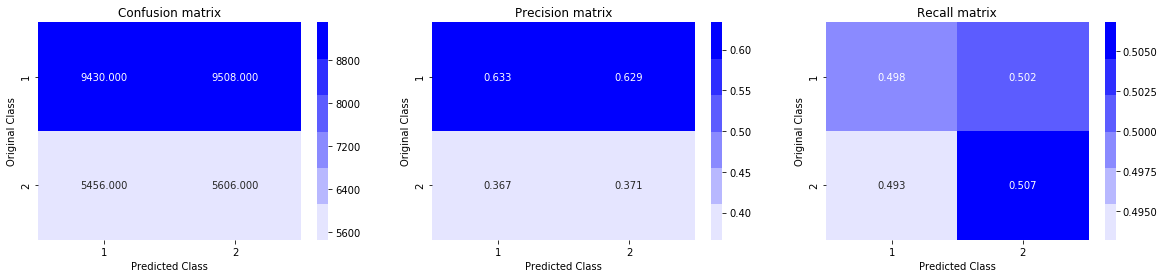

In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5659911171735498
For values of alpha =  0.0001 The log loss is: 0.54440807152053
For values of alpha =  0.001 The log loss is: 0.5305567110170777
For values of alpha =  0.01 The log loss is: 0.5349079075087119
For values of alpha =  0.1 The log loss is: 0.536876247680937
For values of alpha =  1 The log loss is: 0.5177512227312777
For values of alpha =  10 The log loss is: 0.5128634430161554


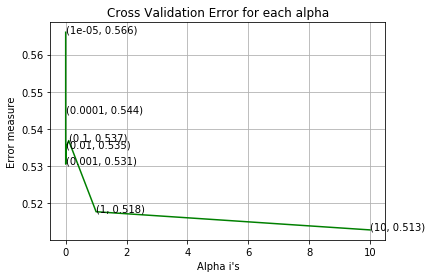

For values of best alpha =  10 The train log loss is: 0.5087918179955724
For values of best alpha =  10 The test log loss is: 0.5128634430161554
Total number of data points : 30000


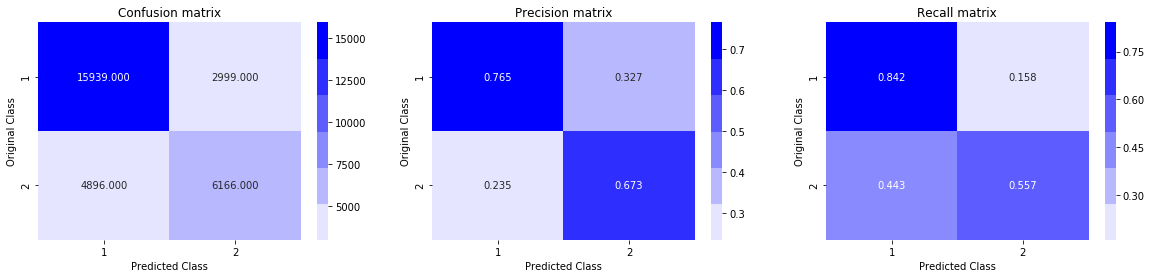

In [23]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5822172175251085
For values of alpha =  0.0001 The log loss is: 0.48972547224556834
For values of alpha =  0.001 The log loss is: 0.5235799027444489
For values of alpha =  0.01 The log loss is: 0.5679823019626862
For values of alpha =  0.1 The log loss is: 0.5949915151216989
For values of alpha =  1 The log loss is: 0.6217106346451221
For values of alpha =  10 The log loss is: 0.6582780963134329


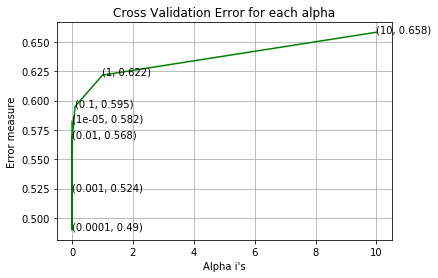

For values of best alpha =  0.0001 The train log loss is: 0.4854935536489957
For values of best alpha =  0.0001 The test log loss is: 0.48972547224556834
Total number of data points : 30000


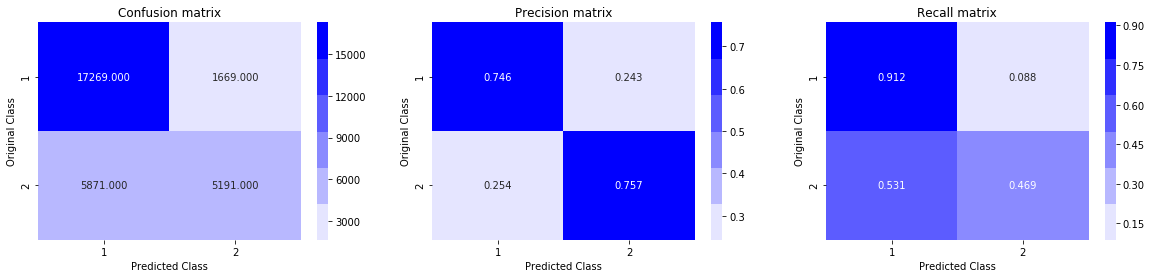

In [24]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [26]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684751	valid-logloss:0.684755
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.613945	valid-logloss:0.613885
[20]	train-logloss:0.562555	valid-logloss:0.562752
[30]	train-logloss:0.524562	valid-logloss:0.524904
[40]	train-logloss:0.494892	valid-logloss:0.495366
[50]	train-logloss:0.471662	valid-logloss:0.472228
[60]	train-logloss:0.452895	valid-logloss:0.453662
[70]	train-logloss:0.437806	valid-logloss:0.438731
[80]	train-logloss:0.425889	valid-logloss:0.426964
[90]	train-logloss:0.416072	valid-logloss:0.417255
[100]	train-logloss:0.407922	valid-logloss:0.409218
[110]	train-logloss:0.401038	valid-logloss:0.402484
[120]	train-logloss:0.395273	valid-logloss:0.396967
[130]	train-logloss:0.39047	valid-logloss:0.392391
[140]	train-logloss:0.386288	valid-logloss:0.388418
[150]	train-logloss:0.382816	valid-logloss:0.385165
[160]	train-logloss:0.379292	

Total number of data points : 30000


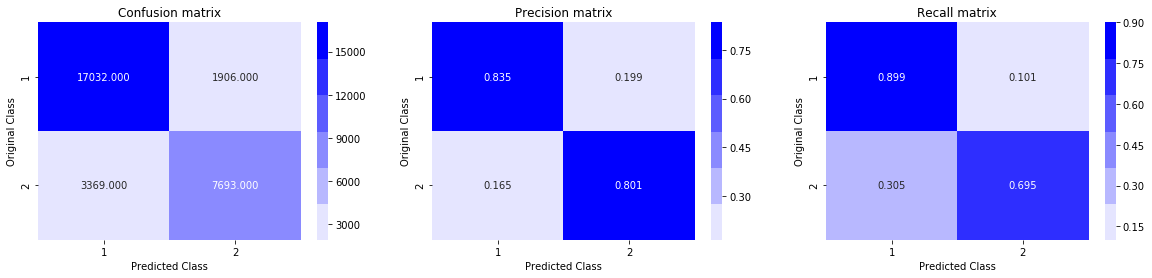

In [27]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Trainingg XGBoost with hyper parameter tuning using Random Search on TFIDF W2V

In [33]:
params = {
        'max_depth': sp_randint(1,11),
        'n_estimators' : sp_randint(5,100),
        }

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1)
xgb_model = RandomizedSearchCV(model, param_distributions = params,n_iter=50, scoring = 'neg_log_loss', n_jobs = -1,cv=3)
xgb_model.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D7039181D0>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D703918320>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_log_loss', verbose=0)

In [34]:
print("Model Score = ",xgb_model.best_score_)
print("Best Params = ",xgb_model.best_params_)

Model Score =  -0.33038620081820536
Best Params =  {'max_depth': 10, 'n_estimators': 99}


In [36]:
optimal_depth = 9
optimal_estimators = 99

In [37]:
clf = xgb.XGBClassifier(max_depth=optimal_depth,objective='binary:logistic',n_estimators=optimal_estimators,n_jobs=-1)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=99, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [38]:
#log loss uses a exact probability score so we have to extract the score from the model
cal_clf = CalibratedClassifierCV(clf, method="sigmoid")
cal_clf.fit(X_train, y_train)
predict_y = cal_clf.predict_proba(X_train)

print("Log loss [Train] : ",log_loss(y_train, predict_y,  eps=1e-15))
predict_y = cal_clf.predict_proba(X_test)
print("Log loss [Test] : ",log_loss(y_test, predict_y,  eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)

Log loss [Train] :  0.2709196503504285
Log loss [Test] :  0.3410140564813574


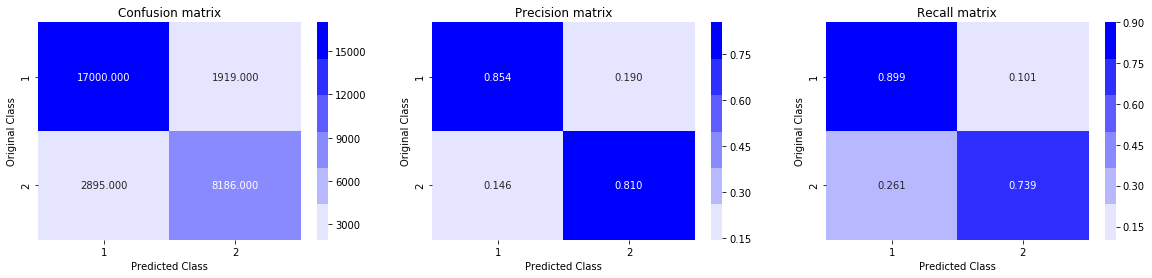

In [41]:
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


# 1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.

In [57]:
# # avoid decoding problems
# df = pd.read_csv("train.csv")
 
# # encode questions to unicode
# # https://stackoverflow.com/a/6812069
# # ----------------- python 2 ---------------------
# # df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# # df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# # ----------------- python 3 ---------------------
# df['question1'] = df['question1'].apply(lambda x: str(x))
# df['question2'] = df['question2'].apply(lambda x: str(x))

In [58]:
# df.head()

In [59]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# # merge texts
# questions = list(df['question1']) + list(df['question2'])

# tfidf = TfidfVectorizer(lowercase=False, )
# tfidf.fit_transform(questions)


In [2]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [3]:
# dropping only qid1, qid1 from the advanced features
df1 = dfnlp.drop(['qid1','qid2',],axis=1)
# dropping only qid1 , qid2, question1, question2 from the advanced features
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

# so finaldf_all = 19columns(df1) + 12columns(df2) = 31 columns

In [4]:
df1.head(2)


,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [5]:
df2.head(2)

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [6]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [7]:
# joining advancedfeatures(df1) and normalfeatures(df2) taking index in common id
finaldf_all = df1.join(df2.set_index('id'), on='id')

In [8]:
finaldf_all.shape

(404290, 30)

In [9]:
finaldf_all.head(2)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,...,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [10]:
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
finaldf_all['question1'] = finaldf_all['question1'].apply(lambda x: str(x))
finaldf_all['question2'] = finaldf_all['question2'].apply(lambda x: str(x))

In [11]:
print(finaldf_all['is_duplicate'].value_counts())
print('Percentage of class 0 / class 1 = ',sum(finaldf_all['is_duplicate']==0)/sum(finaldf_all['is_duplicate']==1))

0    255027
1    149263
Name: is_duplicate, dtype: int64
Percentage of class 0 / class 1 =  1.708574797505075


In [12]:
# Sampling 100k data points for the model
finaldf_100k = finaldf_all.sample(n=100000,random_state = 1)
print(finaldf_100k.shape)

(100000, 30)


In [13]:
print(finaldf_100k['is_duplicate'].value_counts())
print('Percentage of class 0 / class 1 = ',sum(finaldf_100k['is_duplicate']==0)/sum(finaldf_100k['is_duplicate']==1))

0    63062
1    36938
Name: is_duplicate, dtype: int64
Percentage of class 0 / class 1 =  1.7072391575071741


In [14]:
# taking actual label from dataset(100k)
y_true = finaldf_100k['is_duplicate']

In [15]:
# randomly sampling 70% to train and 30% to test dataset
X_train,X_test, y_train, y_test = train_test_split(finaldf_100k, y_true, stratify=y_true, test_size=0.3)

In [16]:
print('Data Points ::-\n')
print('** Train Data **')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('** Test Data **')
print(X_test.shape)
print(y_test.shape)

Data Points ::-

** Train Data **
(70000, 30)
(70000,)


** Test Data **
(30000, 30)
(30000,)


In [17]:
print('Percentage of class 0 / class 1 (train Data) = ',sum(y_train==0)/sum(y_train==1))
print('Percentage of class 0 / class 1 (test Data) = ',sum(y_test==0)/sum(y_test==1))

Percentage of class 0 / class 1 (train Data) =  1.707197277333024
Percentage of class 0 / class 1 (test Data) =  1.7073368829528022


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# storing length of actual label from train and test dataset
test_len = len(y_test)
train_len = len(y_train)

In [20]:
# converting our test and train data questions 1 into tfidf vec
tfidf_vectorizer_qs1 = TfidfVectorizer(lowercase=False)
tfidf_qs1_train = tfidf_vectorizer_qs1.fit_transform(X_train['question1'])
tfidf_qs1_test  = tfidf_vectorizer_qs1.transform(X_test['question1'])

print(tfidf_qs1_train.shape)
print(tfidf_qs1_test.shape)

(70000, 31115)
(30000, 31115)


In [21]:
# converting our test and train data questions 2 into tfidf vec
tfidf_vectorizer_qs2 = TfidfVectorizer(lowercase=False)
tfidf_qs2_train = tfidf_vectorizer_qs2.fit_transform(X_train['question2'])
tfidf_qs2_test  = tfidf_vectorizer_qs2.transform(X_test['question2'])

print(tfidf_qs2_train.shape)
print(tfidf_qs2_test.shape)

(70000, 29000)
(30000, 29000)


In [22]:

#Combining the two dataframe

train_tfidf = hstack((tfidf_qs1_train,tfidf_qs2_train))
test_tfidf = hstack((tfidf_qs1_test,tfidf_qs2_test))

print("train data shape",train_tfidf.shape)
print("Test data shape ",test_tfidf.shape)

train data shape (70000, 60115)
Test data shape  (30000, 60115)


In [23]:
X_train.head(1)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
81276,81276,what are the environmental impacts of the tour...,what are the environmental impacts of the tour...,0,0.857131,0.857131,0.999988,0.999988,0.874995,0.874995,...,2,102,100,16,16,14.0,30.0,0.466667,6,2


In [24]:
# Dropping id and questions from the dataset after tfidf vectorizing the data
train_feature_df = X_train.drop(['id','question1','question2','is_duplicate'], axis=1, inplace=False)
test_feature_df = X_test.drop(['id','question1','question2','is_duplicate'], axis=1, inplace=False)

In [25]:
train_feature_df.head(1)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
81276,0.857131,0.857131,0.999988,0.999988,0.874995,0.874995,0.0,1.0,0.0,16.0,...,2,102,100,16,16,14.0,30.0,0.466667,6,2


In [26]:
print(type(train_tfidf))
print(type(test_tfidf))

<class 'scipy.sparse.coo.coo_matrix'>
<class 'scipy.sparse.coo.coo_matrix'>


In [27]:
import scipy

In [28]:
# since both the data is sparse matrix to we need to convert the dataframe to sparse before combining them
train_sparse = scipy.sparse.csr_matrix(train_feature_df)
test_sparse = scipy.sparse.csr_matrix(test_feature_df)

print("TRAIN data Shape = ",train_sparse.shape," Type is",type(train_sparse))
print("TEST data shape = ",test_sparse.shape, " Type is", type(test_sparse))

TRAIN data Shape =  (70000, 26)  Type is <class 'scipy.sparse.csr.csr_matrix'>
TEST data shape =  (30000, 26)  Type is <class 'scipy.sparse.csr.csr_matrix'>


In [29]:
# Combining tfidf features of question 1 and question 2 to the original test and train dataset
train_data_final = hstack((train_tfidf,train_sparse))
test_data_final = hstack((test_tfidf,test_sparse))

print("train data shape",train_data_final.shape)
print("Test data shape ",test_data_final.shape)

train data shape (70000, 60141)
Test data shape  (30000, 60141)


In [30]:
scaler = StandardScaler(with_mean=False)
standardized_data_train = scaler.fit_transform(train_data_final)
standardized_data_test = scaler.transform(test_data_final)

print("train data shape",standardized_data_train.shape)
print("Test data shape ",standardized_data_test.shape)

train data shape (70000, 60141)
Test data shape  (30000, 60141)


In [31]:
X_train = standardized_data_train
X_test = standardized_data_test

## Logistic Regression with hyperparameter tuning on simple tfidf

In [84]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of alpha =  1e-05 The log loss is: 0.547732391964942
For values of alpha =  0.0001 The log loss is: 0.5489341876631273
For values of alpha =  0.001 The log loss is: 0.548806067574757
For values of alpha =  0.01 The log loss is: 0.5428632737210181
For values of alpha =  0.1 The log loss is: 0.472887357519554
For values of alpha =  1 The log loss is: 0.4672293297155528
For values of alpha =  10 The log loss is: 0.5186566212565014


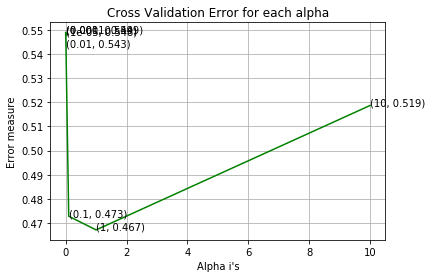

In [85]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()




In [86]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)



CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False, class_weight=None, early_stopping=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
            cv='warn', method='sigmoid')

For values of best alpha =  1 The train log loss is: 0.33889561803523943
For values of best alpha =  1 The test log loss is: 0.4672293297155528
Total number of data points : 30000


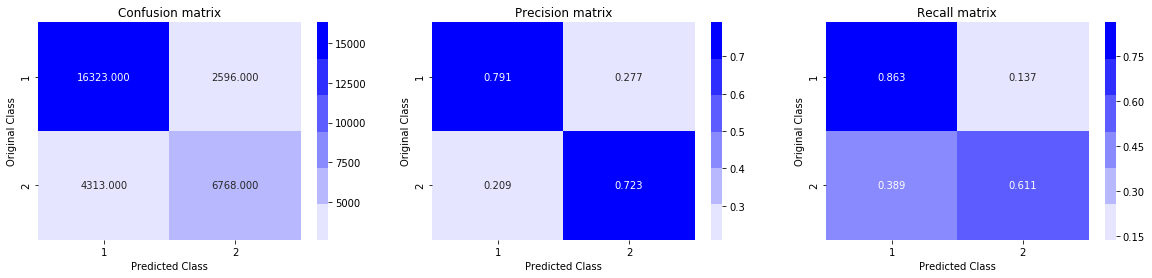

In [87]:
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

##  Linear SVM with hyperparameter tuning on simple tfidf

In [88]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



For values of alpha =  1e-05 The log loss is: 0.5559032043168742
For values of alpha =  0.0001 The log loss is: 0.5615692283380993
For values of alpha =  0.001 The log loss is: 0.5929335291252507
For values of alpha =  0.01 The log loss is: 0.650947587028671
For values of alpha =  0.1 The log loss is: 0.6585032494315671
For values of alpha =  1 The log loss is: 0.6586095185894604
For values of alpha =  10 The log loss is: 0.6585854178142828


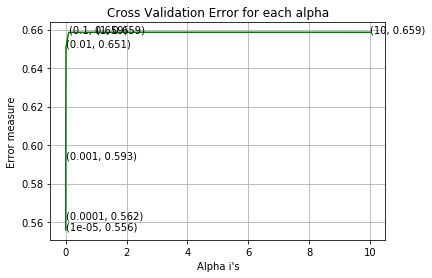

In [89]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()




In [90]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)



CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid')

For values of best alpha =  1e-05 The train log loss is: 0.44269165342175554
For values of best alpha =  1e-05 The test log loss is: 0.5559032043168742
Total number of data points : 30000


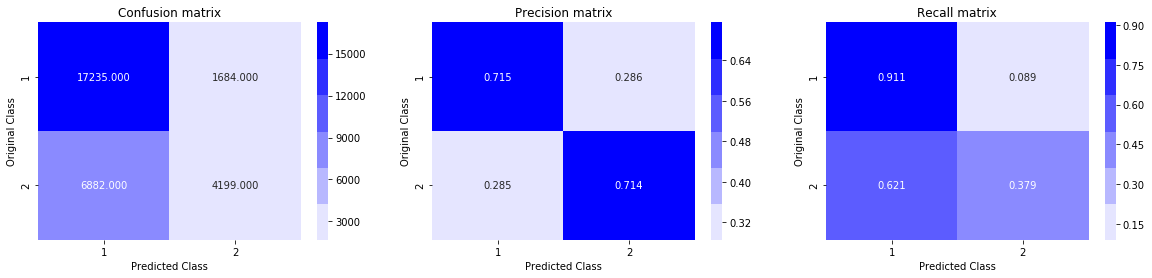

In [91]:
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.

In [32]:
from xgboost import XGBClassifier
import xgboost as xgb
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV

In [97]:
params = {
        'max_depth': sp_randint(1,11),
        'n_estimators' : sp_randint(5,100),
        }

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',n_jobs=-1)
xgb_model = RandomizedSearchCV(model, param_distributions = params,n_iter=50, scoring = 'neg_log_loss', n_jobs = -1,cv=3)
xgb_model.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000188F37E7BE0>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000188F37E70B8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_log_loss', verbose=0)

In [98]:
print("Model Score = ",xgb_model.best_score_)
print("Best Params = ",xgb_model.best_params_)

Model Score =  -0.3311565819423388
Best Params =  {'max_depth': 9, 'n_estimators': 99}


In [99]:
optimal_depth = 9
optimal_estimators = 99

In [100]:
clf = xgb.XGBClassifier(max_depth=optimal_depth,objective='binary:logistic',n_estimators=optimal_estimators,n_jobs=-1)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=99, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [101]:
#log loss uses a exact probability score so we have to extract the score from the model
cal_clf = CalibratedClassifierCV(clf, method="sigmoid")
cal_clf.fit(X_train, y_train)
predict_y = cal_clf.predict_proba(X_train)

print("Log loss [Train] : ",log_loss(y_train, predict_y,  eps=1e-15))
predict_y = cal_clf.predict_proba(X_test)
print("Log loss [Test] : ",log_loss(y_test, predict_y,  eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)


Log loss [Train] :  0.2731294931537392
Log loss [Test] :  0.34512334361549624


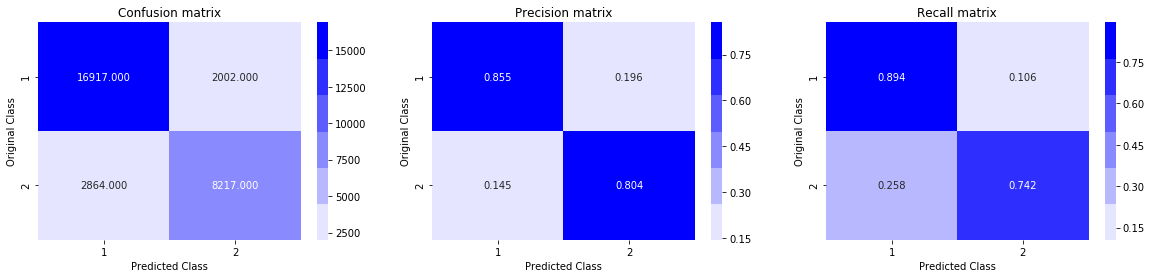

In [102]:
plot_confusion_matrix(y_test, predicted_y)

## Conclusion

In [103]:
print("COMPARISON between TFIDF W2VEC & TFIDF  Models")
print("")
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model(TF-IDF w2v)", "Train log loss", "Test log loss"]

x.add_row(["Logistic Regression", 0.5087, 0.5128])
x.add_row(["Linear SVM", 0.4854, 0.4897])
x.add_row(["XGBoost(not tuned)", 0.3412, 0.3521])
print(x)

x = PrettyTable()
x.field_names = ["Model(TF-IDF)", "Train log loss", "Test log loss"]

x.add_row(["Logistic Regression", 0.3388,0.4672])
x.add_row(["Linear SVM", 0.4426, 0.5559])
x.add_row(["XGBoost(tuned)",  0.2731, 0.3451])
print(x)

COMPARISON between TFIDF W2VEC & TFIDF  Models

+---------------------+----------------+---------------+
|  Model(TF-IDF w2v)  | Train log loss | Test log loss |
+---------------------+----------------+---------------+
| Logistic Regression |     0.5087     |     0.5128    |
|      Linear SVM     |     0.4854     |     0.4897    |
|  XGBoost(not tuned) |     0.3412     |     0.3521    |
+---------------------+----------------+---------------+
+---------------------+----------------+---------------+
|    Model(TF-IDF)    | Train log loss | Test log loss |
+---------------------+----------------+---------------+
| Logistic Regression |     0.3388     |     0.4672    |
|      Linear SVM     |     0.4426     |     0.5559    |
|    XGBoost(tuned)   |     0.2731     |     0.3451    |
+---------------------+----------------+---------------+
